# Trabalho: Proposta de Mineração de Dados

**Intruções iniciais**

UTILIZANDO OS DADOS DISPONIBILIZADOS NO ARQUIVO (DATASET: SINAISVITAIS003 100DIAS DV2 XXXX.TXT , ONDE xxxx INDICA O PRIMEIRO DÍGITO DO SEU RA – DA DIREITA PARA A ESQUERDA), APRESENTE UMA PROPOSTA DE MINERAÇÃO DE DADOS UTILIZANDO OS ELEMENTOS DE ESTATÍSTICAS DESENVOLVIDOS EM CLASSE.

UMA DAS PRIMEIRAS ETAPAS DA MINERAÇÃO DE DADOS É A PREPARAÇÃO DA BASE DE DADOS. OBSERVE NOS GRÁFICOS ABAIXO QUE OS DADOS POSSUEM ALGUMAS ANOMALIAS OU VALORES ESPÚRIOS OU RUÍDOS, QUE DEVEM SER REMOVIDAS. OS PARÂMETROS MÁXIMOS (EM REPOUSO) PARA O BATIMENTO CARDÍACO, A PRESSÃO ARTERIAL E A TEMPERATURA CORPORAL SÃO OS SEGUINTES:

0 <= Batimento <= 100

0 <= Pressão <= 20

0 <= Temperatura <= 40

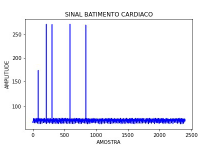 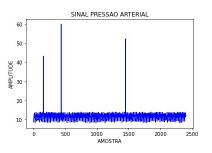 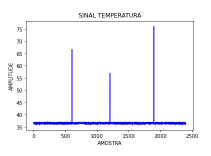

**Início da solução do problema.**

In [16]:
# Importação das Bibliotecas
import os
import csv
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Definição de constantes

In [17]:
media_literal: str = "Média"
mediana_literal: str = "Mediana"
moda_literal: str = "Moda"
desvio_padrao_literal: str = "Desvio Padrão"
batimento_literal: str = "BATIMENTO"
temperatura_literal: str = "TEMPERATURA"
pressao_literal: str = "PREASSAO"
batimento_cardiaco_literal: str = "Batimento Cardíaco"
pressao_arterial_literal: str = "Pressão Arterial"
temperatura_corporal_literal: str = "Temperatura Corporal"
hora_literal: str = "HORA"

**1)** DESENVOLVER UM PROCEDIMENTO PARA EFETUAR A PREPARAÇÃO DOS DADOS – GERALMENTE OS VALORES FORA DA FAIXA DE ANÁLISE PADRÃO SÃO “REMOVIDOS”/”SUBSTITUÍDOS” POR UM VALOR MÉDIO ENTRE O VALOR ANTECESSOR E POSTERIOR. DESENVOLVER O SOFTWARE EM PYTHON.

**Comentário:** O arquivo com a base de dados escolhido foi o "sinaisvitais003 100dias DV2 RAxxx4".

In [18]:
# ============================= LEITURA DOS DADOS =============================
dados = []

path = os.getcwd()+os.sep+"sinaisvitais003 100dias DV2 RAxxx4.txt"
with open(path,'r',newline='') as ARQUIVO:
    d = csv.reader(ARQUIVO)
    dd = list(d)
    for i in range(0,len(dd)):
        p = dd[i][0]  
        palavras = p.split("\t")
        dados.append({"HORA":palavras[0],batimento_literal:palavras[1],
                      pressao_literal:palavras[2],temperatura_literal:palavras[3]})

# Criar o DataFrame Inicial
df0 = pd.DataFrame(data = dados, dtype=float)

# Criar o DataFrame Final
df = pd.DataFrame(data = dados, dtype=float)

**Preparação dos Dados:** o script a seguir tem a finalidade de eliminar os valores fora dos intervalos abaixo (intervalo padrão dos sinais vitais). 

0 <= Batimento <= 100

0 <= Pressão <= 20

0 <= Temperatura <= 40

In [19]:
# Substituir pela média global entre a medida anterior e posterior do valor espúrio
for j in range(len(dd)):
    if (df[batimento_literal][j] > 100) | (df[batimento_literal][j] < 0):
        m_aux = (df[batimento_literal][j-1]+df[batimento_literal][j+1])/2
        df[batimento_literal].replace(df[batimento_literal][j], m_aux, inplace=True)

    if (df[pressao_literal][j] > 20) | (df[pressao_literal][j] < 0):
        m_aux = (df[pressao_literal][j-1]+df[pressao_literal][j+1])/2
        df[pressao_literal].replace(df[pressao_literal][j], m_aux, inplace=True)

    if (df[temperatura_literal][j] > 40) | (df[temperatura_literal][j] < 0):
        m_aux = (df[temperatura_literal][j-1]+df[temperatura_literal][j+1])/2
        df[temperatura_literal].replace(df[temperatura_literal][j], m_aux, inplace=True)

**Plotagem dos sinais vitais após o tratamento dos dados.**

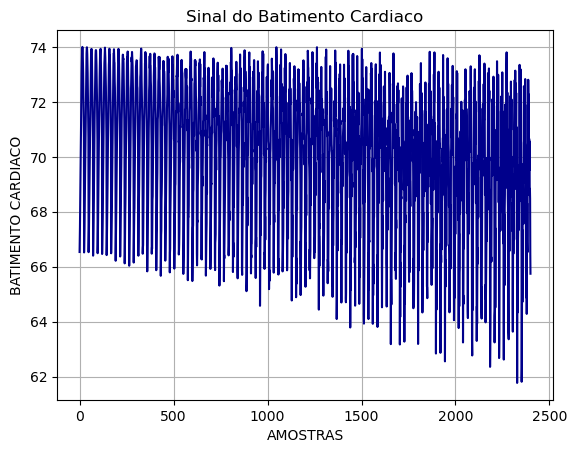

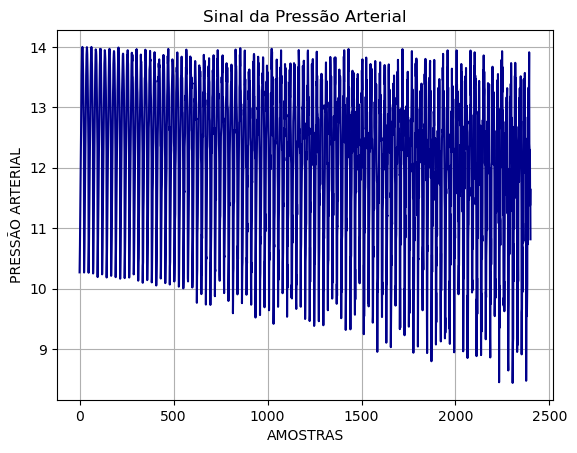

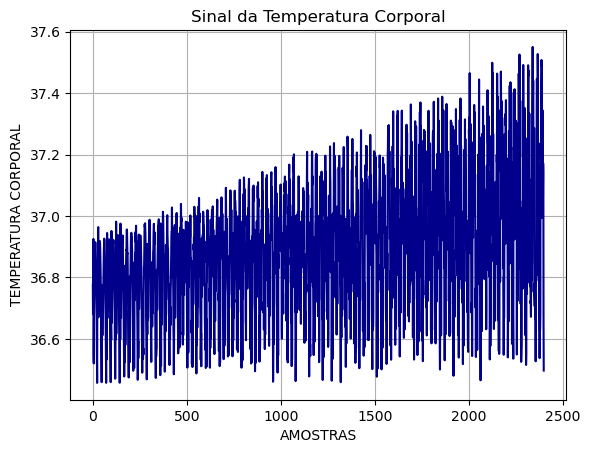

In [20]:
# Plotar o sinal do batimento cardíaco
plt.plot(df[batimento_literal],color='darkblue')
plt.grid()
plt.title("Sinal do Batimento Cardiaco")
plt.xlabel("AMOSTRAS")
plt.ylabel("BATIMENTO CARDIACO")
plt.show()

# Plotar o sinal da pressão arterial
plt.plot(df[pressao_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Pressão Arterial")
plt.xlabel("AMOSTRAS")
plt.ylabel("PRESSÃO ARTERIAL")
plt.show()

# Plotar o sinal da temperatura
plt.plot(df[temperatura_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Temperatura Corporal")
plt.xlabel("AMOSTRAS")
plt.ylabel("TEMPERATURA CORPORAL")
plt.show()

Diante disso, convém dizer que os sinais vitais, e os histogramas dos dados antes do tratamento podem ser observados no Apêndice deste trabalho.

**Confirmar se a base de dados foi preparada corretamente após o tratamento realizado nos úlimos passos:** o script a seguir verifica, na base de dados, se há algum valor faltante, ou fora do intervalo abaixo.

0 <= Batimento <= 100

0 <= Pressão <= 20

0 <= Temperatura <= 40

In [6]:
# Verificar se há valores faltantes
print("\nQuantidade de valores faltantes:")
print(df.isnull().sum())

# Valores fora da faixa de análise padrão
valores_fora = pd.DataFrame()
# Contar valores fora da faixa, e inserir em um DataFrame
valores_fora[''] = [batimento_literal,'Pressão',temperatura_literal]
valores_fora['Valores abaixo da faixa'] = [sum(i <= 0 for i in df[batimento_literal]),
                                           sum(i <= 0 for i in df[pressao_literal]),
                                           sum(i <= 0 for i in df[temperatura_literal])]

valores_fora['Valores acima da faixa'] = [sum(i >= 100 for i in df[batimento_literal]),
                                          sum(i >= 20 for i in df[pressao_literal]),
                                          sum(i >= 40 for i in df[temperatura_literal])] 

valores_fora['Total'] = valores_fora['Valores abaixo da faixa'] + valores_fora['Valores acima da faixa']
                                     
print("\nQuantidade de valores fora da faixa:")
print(valores_fora.to_string(index = False))



Quantidade de valores faltantes:
HORA           0
BATIMENTO      0
PREASSAO       0
TEMPERATURA    0
dtype: int64

Quantidade de valores fora da faixa:
             Valores abaixo da faixa  Valores acima da faixa  Total
  BATIMENTO                        0                       0      0
    Pressão                        0                       0      0
TEMPERATURA                        0                       0      0


**Conclusão:** Conforme o esperado, após a preparação dos dados, a base de dados escolhida para este trabalho não possui valores faltante e, passou não ter valores fora do intervalo padrão.

**2)** CONSIDERANDO-SE QUE O PACOTE PADRÃO DE DADOS CONTÉM 24 AMOSTRAS COLETADAS A CADA HORA, APLIQUE A CORRELAÇÃO, PARA CADA UM DOS PARÂMETROS (O BATIMENTO CARDÍACO, A PRESSÃO ARTERIAL E A TEMPERATURA CORPORAL), PROCURE IDENTIFICAR PADRÕES DE COMPORTAMENTOS NOS VALORES AMOSTRADOS. ATENÇÃO, É PRECISO SEGMENTAR O ARQUIVO EM PACOTES MENORES COM 24 AMOSTRA CADA, OU SEJA, DIVIDA O ARQUIVO EM PACOTES COM 24 AMOSTRA CADA E APLIQUE AS FERRAMENTAS ESTATÍSTICAS. DESENVOLVER O SOFTWARE EM PYTHON.

    Correlação do Batimento  Correlação da Pressão  Correlação da Temperatura
0                  0.999979               0.999986                   0.555411
1                  0.999901               0.999949                   0.806074
2                  0.999685               0.999828                   0.849171
3                  0.999671               0.999644                   0.800138
4                  0.999390               0.999690                   0.800802
..                      ...                    ...                        ...
94                 0.757699               0.780387                   0.673057
95                 0.665690               0.913950                   0.463700
96                 0.729542               0.866810                   0.612798
97                 0.851996               0.783753                   0.756383
98                 0.699210               0.847218                   0.751642

[99 rows x 3 columns]


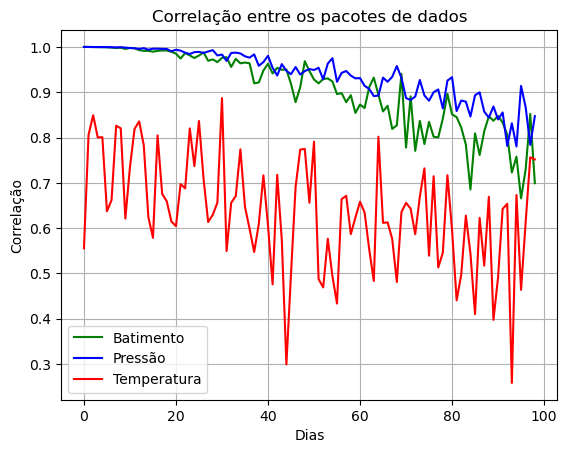

In [7]:
n = 0
corr_batimento = []
corr_pressao = []
corr_temperatura = []
int_corr_batimento = pd.DataFrame(columns = ['Classificação', 'Valor'], index = range(0,99))
int_corr_pressao = pd.DataFrame(columns = ['Classificação', 'Valor'], index = range(0,99))
int_corr_temperatura = pd.DataFrame(columns = ['Classificação', 'Valor'], index = range(0,99))
 
df_correlacao = pd.DataFrame()
auxDF = pd.DataFrame()

# Segmentação do Datasete
for k in range(0,2376,24):
    
    # Cálculo da correlação de cada pacote de dados
    auxDF['m'] = np.array(df[batimento_literal][k:k+24])
    auxDF['n'] = np.array(df[batimento_literal][k+24:k+48])
    
    corr_aux = auxDF.corr(method ='pearson')['m'][1]
    
    # Vetor com a correlação entre os pacotes de dados do Batimento Cardíaco
    corr_batimento.append(corr_aux)
    
    # Classificar a correlação do Batimento Cardíaco como "Muito Forte", "Forte", "Moderada", "Fraca", e "Bem Fraca"
    if (corr_aux >= 0.9):
        int_corr_batimento['Classificação'][n] = "Muito Forte"
        int_corr_batimento['Valor'][n] = 1
    
    elif (corr_aux >= 0.7 and corr_aux < 0.9):
        int_corr_batimento['Classificação'][n] = "Forte"
        int_corr_batimento['Valor'][n] = 0.89
        
    elif (corr_aux >= 0.4 and corr_aux < 0.7):
        int_corr_batimento['Classificação'][n] = "Moderada"
        int_corr_batimento['Valor'][n] = 0.69
        
    elif (corr_aux >= 0.2 and corr_aux < 0.4):
        int_corr_batimento['Classificação'][n] = "Fraca"
        int_corr_batimento['Valor'][n] = 0.39
        
    elif (corr_aux >= 0 and corr_aux < 0.2):
        int_corr_batimento['Classificação'][n] = "Bem Fraca"
        int_corr_batimento['Valor'][n] = 0.19

    auxDF['m'] = np.array(df[pressao_literal][k:k+24])
    auxDF['n'] = np.array(df[pressao_literal][k+24:k+48])
    
    corr_aux = auxDF.corr(method ='pearson')['m'][1]
    
    # Vetor com a correlação entre os pacotes de dados da Pressão Arterial
    corr_pressao.append(corr_aux)  
    
    # Classificar a correlação da Pressão Arterial como "Muito Forte", "Forte", "Moderada", "Fraca", e "Bem Fraca"
    if (corr_aux >= 0.9):
        int_corr_pressao['Classificação'][n] = "Muito Forte"
        int_corr_pressao['Valor'][n] = 1
    
    elif (corr_aux >= 0.7 and corr_aux < 0.9):
        int_corr_pressao['Classificação'][n] = "Forte"
        int_corr_pressao['Valor'][n] = 0.89
        
    elif (corr_aux >= 0.4 and corr_aux < 0.7):
        int_corr_pressao['Classificação'][n] = "Moderada"
        int_corr_pressao['Valor'][n] = 0.69
        
    elif (corr_aux >= 0.2 and corr_aux < 0.4):
        int_corr_pressao['Classificação'][n] = "Fraca"
        int_corr_pressao['Valor'][n] = 0.39
        
    elif (corr_aux >= 0 and corr_aux < 0.2):
        int_corr_pressao['Classificação'][n] = "Bem Fraca"
        int_corr_pressao['Valor'][n] = 0.19

    auxDF['m'] = np.array(df[temperatura_literal][k:k+24])
    auxDF['n'] = np.array(df[temperatura_literal][k+24:k+48])
    
    corr_aux = auxDF.corr(method ='pearson')['m'][1]
    
    # Vetor com a correlação entre os pacotes de dados da Temperatura Corporal
    corr_temperatura.append(corr_aux)
    
    # Classificar a correlação da Temperatura Corporal como "Muito Forte", "Forte", "Moderada", "Fraca", e "Bem Fraca"
    if (corr_aux >= 0.9):
        int_corr_temperatura['Classificação'][n] = "Muito Forte"
        int_corr_temperatura['Valor'][n] = 1
    
    elif (corr_aux >= 0.7 and corr_aux < 0.9):
        int_corr_temperatura['Classificação'][n] = "Forte"
        int_corr_temperatura['Valor'][n] = 0.89
        
    elif (corr_aux >= 0.4 and corr_aux < 0.7):
        int_corr_temperatura['Classificação'][n] = "Moderada"
        int_corr_temperatura['Valor'][n] = 0.69
        
    elif (corr_aux >= 0.2 and corr_aux < 0.4):
        int_corr_temperatura['Classificação'][n] = "Fraca"
        int_corr_temperatura['Valor'][n] = 0.39
        
    elif (corr_aux >= 0 and corr_aux < 0.2):
        int_corr_temperatura['Classificação'][n] = "Bem Fraca"
        int_corr_temperatura['Valor'][n] = 0.19
    
    n = n + 1
    
df_correlacao['Correlação do Batimento'] = corr_batimento
df_correlacao['Correlação da Pressão'] = corr_pressao
df_correlacao['Correlação da Temperatura'] = corr_temperatura

print(df_correlacao)

# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Correlação entre os pacotes de dados")
plt.plot(corr_batimento, color = 'g', label = 'Batimento')
plt.plot(corr_pressao, color = 'b', label = 'Pressão')
plt.plot(corr_temperatura, color = 'r', label = 'Temperatura')
plt.xlabel("Dias")
plt.ylabel("Correlação")
plt.legend()

**Pesquisa:**

De acordo com as notas de aula da professora de Estatística da UFPR, Silvia Shimakura, a tabela a seguir serve como uma boa guia para interpretar o coeficiente de correlação de Pearson.

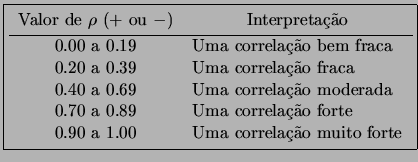

Nesse sentido, normalizamos o gráfico anterior para vincular com as informações da tabela, e ficou da seguinte forma:

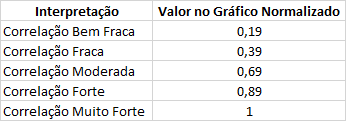

**Referência:** Notas de Aula. Professora Silvia Shimakura. Disponível em: http://leg.ufpr.br/~silvia/CE003/node74.html. Acesso em: 15 de Abril de 2023;

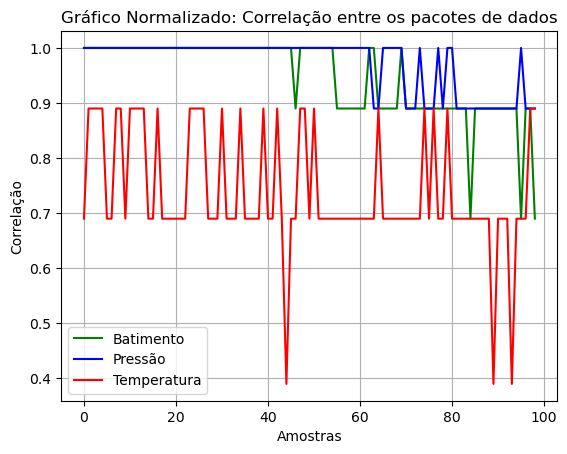

In [24]:
# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Gráfico Normalizado: Correlação entre os pacotes de dados")
plt.plot(int_corr_batimento['Valor'], color = 'g', label = 'Batimento')
plt.plot(int_corr_pressao['Valor'], color = 'b', label = 'Pressão')
plt.plot(int_corr_temperatura['Valor'], color = 'r', label = 'Temperatura')
plt.xlabel("Amostras")
plt.ylabel("Correlação")
plt.legend()

**Conclusão:**

Diante disso, é possível indentificar os seguintes padrões de comportamentos:

- **Batimento**: Entre os dias 1 e 47, os dados são muito fortementes correlacionados e, portanto, pode-se dizer que há um padrão muito bem observado. Na sequência, a correlação oscilou entre as classificações "Forte" e "Muito Forte". Entretanto, há três momentos que a correlação foi considerada "Moderada", porém, mesmo com estas oscilações, é possível considerar que o batimento cardíaco possui um comportamento padrão.
- **Pressão**: Entre os dias 1 e 64, os dados são muito fortementes correlacionados e, portanto, pode-se dizer que há um padrão muito bem observado. Na sequência, a correlação oscilou entre as classificações "Forte" e "Muito Forte" e, isso leva crer que o comprtamento dos dados começou a sofrer alterações, mas, ainda assim, a variável continua tendo um comportamento padrão.
- **Temperatura**: Dos três sinais vitais, a temperatura é a menos padronizada, pois a correlação está, predominantemente, classificada entre "Forte" e "Moderada", e em três momentos foi considerada "Fraca". Entretanto, pode-se dizer que há um padrão comportamental, haja vista que a temperatura variou muito pouco entre os 100 dias, ou seja, a menor temperatura média de um determinado dia foi de 36.75 °C e a maior foi de 37.05 °C, isto é, 0.3 °C de diferença.

**3)** A CORRELAÇÃO PODE SER APLICADA INDIVIDUALMENTE PARA CADA UM DOS PARÂMETROS APRESENTADOS, CONTUDO, VOCÊ PODE APLICAR A CORRELAÇÃO EM DOIS PARÂMETROS SIMULTANEAMENTE PARA A IDENTIFICAÇÃO DE PADRÕES ? POR EXEMPLO, DADO UM PERÍODO DE TEMPO, RESPEITANDO O TAMANHO DO PACOTE DE DADOS E A AMOSTRAGEM, PODE-SE UTILIZAR OS VALORES DE CORRELAÇÃO ENTRE BATIMENTOS CARDÍACOS E PRESSÃO ARTERIAL PARA COMPOR UM NOVO PADRÃO DE APRENDIZADO? AVALIE ESTA QUESTÃO - APRESENTE UMA SOLUÇÃO/RESOLUÇÃO. DESENVOLVER O SOFTWARE EM PYTHON.

    Batimento x Pressão  Batimento x Temperatura  Temperatura x Pressão
0              1.000000                 0.391996               0.391996
1              0.999963                 0.301002               0.300423
2              0.999904                 0.538682               0.539733
3              0.999722                 0.554257               0.555694
4              0.999626                 0.454708               0.448698
..                  ...                      ...                    ...
95             0.833688                 0.640967               0.643865
96             0.810722                 0.698221               0.816937
97             0.817140                 0.489538               0.537313
98             0.840495                 0.612371               0.675077
99             0.709203                 0.759887               0.612879

[100 rows x 3 columns]


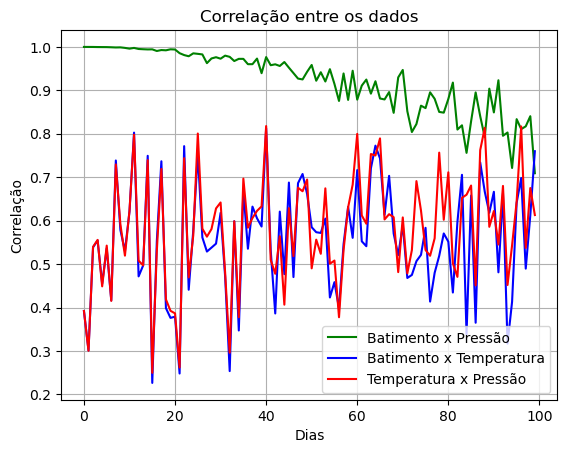

In [9]:
df_correlacao2 = pd.DataFrame()
n = 0
c_BATIMENTOxPRESSAO = []
c_BATIMENTOxTEMPERATURA = []
c_TEMPERATURAxPRESSAO  = []

int_corr_BATIMENTOxPRESSAO = pd.DataFrame(columns = ['Classificação', 'Valor'], index = range(0,99))
int_corr_BATIMENTOxTEMPERATURA = pd.DataFrame(columns = ['Classificação', 'Valor'], index = range(0,99))
int_corr_TEMPERATURAxPRESSAO = pd.DataFrame(columns = ['Classificação', 'Valor'], index = range(0,99))

# Segmentação do Datasete em 100 pacotes com 24 amostras
for k in range(0,2400,24):
    
    # Cálculo da correlação de cada pacote de dados
    correlacao = df[k:k+24].corr(method ='pearson')
    
    # Classificar a correlação da Pressão Arterial como "Muito Forte", "Forte", "Moderada", "Fraca", e "Bem Fraca"
    if (correlacao[batimento_literal][2] >= 0.9):
        int_corr_BATIMENTOxPRESSAO['Classificação'][n] = "Muito Forte"
        int_corr_BATIMENTOxPRESSAO['Valor'][n] = 1
    
    elif (correlacao[batimento_literal][2] >= 0.7 and correlacao[batimento_literal][2] < 0.9):
        int_corr_BATIMENTOxPRESSAO['Classificação'][n] = "Forte"
        int_corr_BATIMENTOxPRESSAO['Valor'][n] = 0.89
        
    elif (correlacao[batimento_literal][2] >= 0.4 and correlacao[batimento_literal][2] < 0.7):
        int_corr_BATIMENTOxPRESSAO['Classificação'][n] = "Moderada"
        int_corr_BATIMENTOxPRESSAO['Valor'][n] = 0.69
        
    elif (correlacao[batimento_literal][2] >= 0.2 and correlacao[batimento_literal][2] < 0.4):
        int_corr_BATIMENTOxPRESSAO['Classificação'][n] = "Fraca"
        int_corr_BATIMENTOxPRESSAO['Valor'][n] = 0.39
        
    elif (correlacao[batimento_literal][2] >= 0 and correlacao[batimento_literal][2] < 0.2):
        int_corr_BATIMENTOxPRESSAO['Classificação'][n] = "Bem Fraca"
        int_corr_BATIMENTOxPRESSAO['Valor'][n] = 0.19

    c_BATIMENTOxPRESSAO.append(correlacao[batimento_literal][2])
    
    # Classificar a correlação da Pressão Arterial como "Muito Forte", "Forte", "Moderada", "Fraca", e "Bem Fraca"
    if (correlacao[batimento_literal][3] >= 0.9):
        int_corr_BATIMENTOxTEMPERATURA['Classificação'][n] = "Muito Forte"
        int_corr_BATIMENTOxTEMPERATURA['Valor'][n] = 1
    
    elif (correlacao[batimento_literal][3] >= 0.7 and correlacao[batimento_literal][3] < 0.9):
        int_corr_BATIMENTOxTEMPERATURA['Classificação'][n] = "Forte"
        int_corr_BATIMENTOxTEMPERATURA['Valor'][n] = 0.89
        
    elif (correlacao[batimento_literal][3] >= 0.4 and correlacao[batimento_literal][3] < 0.7):
        int_corr_BATIMENTOxTEMPERATURA['Classificação'][n] = "Moderada"
        int_corr_BATIMENTOxTEMPERATURA['Valor'][n] = 0.69
        
    elif (correlacao[batimento_literal][3] >= 0.2 and correlacao[batimento_literal][3] < 0.4):
        int_corr_BATIMENTOxTEMPERATURA['Classificação'][n] = "Fraca"
        int_corr_BATIMENTOxTEMPERATURA['Valor'][n] = 0.39
        
    elif (correlacao[batimento_literal][3] >= 0 and correlacao[batimento_literal][3] < 0.2):
        int_corr_BATIMENTOxTEMPERATURA['Classificação'][n] = "Bem Fraca"
        int_corr_BATIMENTOxTEMPERATURA['Valor'][n] = 0.19
        
    c_BATIMENTOxTEMPERATURA.append(correlacao[batimento_literal][3])
    
    # Classificar a correlação da Pressão Arterial como "Muito Forte", "Forte", "Moderada", "Fraca", e "Bem Fraca"
    if (correlacao[temperatura_literal][2] >= 0.9):
        int_corr_TEMPERATURAxPRESSAO['Classificação'][n] = "Muito Forte"
        int_corr_TEMPERATURAxPRESSAO['Valor'][n] = 1
    
    elif (correlacao[temperatura_literal][2] >= 0.7 and correlacao[temperatura_literal][2] < 0.9):
        int_corr_TEMPERATURAxPRESSAO['Classificação'][n] = "Forte"
        int_corr_TEMPERATURAxPRESSAO['Valor'][n] = 0.89
        
    elif (correlacao[temperatura_literal][2] >= 0.4 and correlacao[temperatura_literal][2] < 0.7):
        int_corr_TEMPERATURAxPRESSAO['Classificação'][n] = "Moderada"
        int_corr_TEMPERATURAxPRESSAO['Valor'][n] = 0.69
        
    elif (correlacao[temperatura_literal][2] >= 0.2 and correlacao[temperatura_literal][2] < 0.4):
        int_corr_TEMPERATURAxPRESSAO['Classificação'][n] = "Fraca"
        int_corr_TEMPERATURAxPRESSAO['Valor'][n] = 0.39
        
    elif (correlacao[temperatura_literal][2] >= 0 and correlacao[temperatura_literal][2] < 0.2):
        int_corr_TEMPERATURAxPRESSAO['Classificação'][n] = "Bem Fraca"
        int_corr_TEMPERATURAxPRESSAO['Valor'][n] = 0.19
    
    c_TEMPERATURAxPRESSAO.append(correlacao[temperatura_literal][2])
    
    n = n + 1

df_correlacao2['Batimento x Pressão'] = c_BATIMENTOxPRESSAO
df_correlacao2['Batimento x Temperatura'] = c_BATIMENTOxTEMPERATURA
df_correlacao2['Temperatura x Pressão'] = c_TEMPERATURAxPRESSAO

print(df_correlacao2)

# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Correlação entre os dados")
plt.plot(c_BATIMENTOxPRESSAO, color = 'g', label = 'Batimento x Pressão')
plt.plot(c_BATIMENTOxTEMPERATURA, color = 'b', label = 'Batimento x Temperatura')
plt.plot(c_TEMPERATURAxPRESSAO, color = 'r', label = 'Temperatura x Pressão')
plt.xlabel("Dias")
plt.ylabel("Correlação")
plt.legend()

Diante dos scripts que foram desenvolvidos para esta etapa do trabalho, e dos resultados que foram obtidos, convém fazer a mesma análise da questão anterior. Ou seja, normalizar as correlações, e classificar de acordo com a tabela das notas de aula da professora Silvia Shimakura.

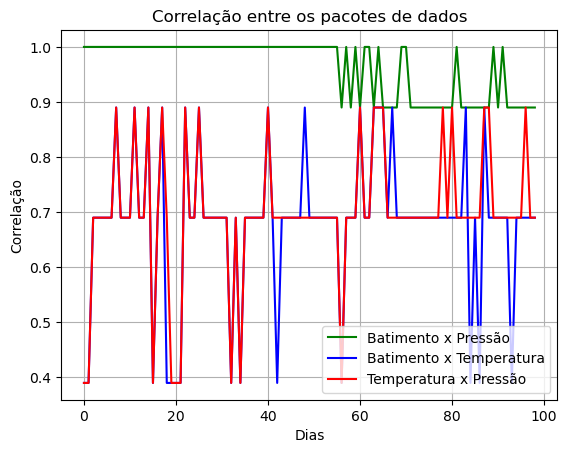

In [21]:
# Plotar a correlação entre os dados
plt.figure()
plt.grid()
plt.title("Gráfico Normalizado: Correlação entre os pacotes de dados")
plt.plot(int_corr_BATIMENTOxPRESSAO['Valor'], color = 'g', label = 'Batimento x Pressão')
plt.plot(int_corr_BATIMENTOxTEMPERATURA['Valor'], color = 'b', label = 'Batimento x Temperatura')
plt.plot(int_corr_TEMPERATURAxPRESSAO['Valor'], color = 'r', label = 'Temperatura x Pressão')
plt.xlabel("Dias")
plt.ylabel("Correlação")
plt.legend()

**Pesquisa:**

Segundo o website do Instituto do Coração de Passo Fundo, "A pressão arterial é a pressão exercida pelo sangue dentro dos vasos sanguíneos, com a força proveniente dos batimentos cardíacos, para fazer com que o mesmo consiga circular por todo o corpo" [1]. Para complementar, no website da clínica Unicardio, há a seguinte informação: "A pressão alta sobrecarrega o coração, que precisa trabalhar mais para que o sangue chegue aos outros órgãos e tecidos do corpo quando a pressão está mais alta que o normal. Por este motivo, surgem as palpitações e as arritmias cardíacas, pois o coração entra em descompasso" [2].

Sobre a relação entre Batimento Cardíaco e Temperatura Corporal, convém citar a informação encontrada no website da Associação Beneficiente Síria: "As altas temperaturas aumentam a espessura do sangue, fazendo subir a pressão e a frequência cardíaca, elevando, assim, o risco de sofrer um infarto ou um derrame" [3]. por fim, sobre a relação entre Temperatura Corporal e Pressão Arterial, vale a pena mencionar o dado encontrado no website do laboratório farmacêutico "Cuidados pela Vida": "Segundo Dr. Francisco, o frio provoca a vasoconstrição e o aumento da resistência vascular, o que resulta na elevação da pressão arterial. Já o calor produz o efeito oposto: causa vasodilatação, diminuindo a resistência dos vasos sanguíneos e reduzindo a pressão em relação a dias de maior frio" [4].

**Conclusão:**

De acordo com a pesquisa anterior, foi possível perceber que todos os sinais vitais possui relações entre si. Diante disso, a seguir, será análisado o quão relacionados são estes sinais com base do "dataset" deste problema.

Nesse sentido, considerando a representação gráfica anterior e a tabela das notas de aulas da professora Silvia Shimakura, conclui-se:

- **Correlação entre Batimento Cardíaco e Pressão Arterial**: Entre os dias 1 e 57, os dados são muito fortementes correlacionados e, portanto, pode-se dizer que há um padrão muito bem observado. Na sequência, a correlação oscilou entre as classificações "Forte" e "Muito Forte". Logo, é possível identificar um padrão de comportamento entre estes dois sinais vitais e, com isso, pode compor um padrão de aprendizado.
- **Correlação entre Batimento Cardíaco e Temperatura Corporal**: A correlação entre estes sinais, varia muito entre as classificações "Forte", "Moderado" e "Fraco". Isso leva a crer que existe, sim, um padrão, porém não é muito consistente.
- **Correlação entre Temperatura Coporal e Pressão Arterial**: A correlação entre estes sinais, também, varia muito entre as classificações "Forte", "Moderado" e "Fraco". Portanto, da mesma forma, pode-se dizer que existe um padrão, porém pouco estabelecido.

**Referências:**

[1] Os novos limites para a pressão arterial. Instituto do Coração de Passo Fundo. Disponível em: https://icor.med.br/os-novos-limites-para-a-pressao-arterial/#:~:text=A%20press%C3%A3o%20arterial%20%C3%A9%20a,circular%20por%20todo%20o%20corpo. Acesso em: 15 de Abril de 2023;

[2] Quais são os sintomas da pressão alta? Unicardio. Disponível em: https://unicardio.com.br/artigos/quais-sao-os-sintomas-da-pressao-alta/#:~:text=A%20press%C3%A3o%20alta%20sobrecarrega%20o,o%20cora%C3%A7%C3%A3o%20entra%20em%20descompasso. Acesso em: 15 de Abril de 2023;

[3] Por que o forte calor pode complicar um quadro de pressão alta? Cuidados Pela Vida. Disponível em: https://cuidadospelavida.com.br/saude-e-tratamento/hipertensao/forte-calor-pressao-alta#:~:text=Segundo%20Dr.,a%20dias%20de%20maior%20frio. Acesso em: 15 de Abril de 2023;

[4] As altas temperaturas aumentam a espessura do sangue, fazendo subir a pressão e a frequência cardíaca, elevando, assim, o risco de sofrer um infarto ou um derrame Associação Beneficiente Síria. Disponível em: https://www.hcor.com.br/imprensa/noticias/cardiologista-do-hcor-alerta-calor-aumenta-o-risco-de-infarto/#:~:text=e%20arritmia%20card%C3%ADaca.-,As%20altas%20temperaturas%20aumentam%20a%20espessura%20do%20sangue%2C%20fazendo%20subir,um%20infarto%20ou%20um%20derrame. Acesso em: 15 de Abril de 2023;

**4)** DIVIDA O ARQUIVO DE DADOS, PARA CADA PARÂMETRO, EM PACOTES COM 24 AMOSTRAS, CORRESPONDENDO A UM DIA DE AMOSTRAGEM. PARA CADA PACOTE AVALIADO, PODE-SE APLICAR FERRAMENTAL ESTATÍSTICO DESCRITIVO: MÉDIA, MEDIANA, MODA, DESVIO PADRÃO E HISTOGRAMA, PARA AUXILIAR NO PROCESSO DE MINERAÇÃO DE DADOS ? PARA CADA PACOTE, CALCULE: MÉDIA, MEDIANA, MODA E DESVIO PADRÃO, PROCURE ESTABELECER CRITÉRIOS PARA TOMADA DE DECISÃO, POR EXEMPLO, SE O VALOR DO BATIMENTO CARDÍACO MÉDIO E DA PRESSÃO ARTERIAL MÉDIA ESTIVEREM ACIMA DE UM DETERMINADO VALOR, APRESENTE UMA MENSAGEM DE ATENÇÃO OU UM ALARME DE EMERGÊNCIA. DESENVOLVER O SOFTWARE EM PYTHON.

**Estatística Descritiva do problema, e Histograma:** O script a seguir tem a finalidade de calcular a Média, Mediana, Moda, Desvio Padrão e, plotar os Histogramas dos sinais vitais, isto é, Batimento Cardiaco, Pressão Arterial, e Temperatura Corporal.

Estatística do Batimento Cardíaco
        Média    Mediana       Moda  Desvio Padrão
0   71.356588  72.000000  70.694593       2.415405
1   71.332927  71.969427  66.519773       2.415998
2   71.309134  71.943245  66.529782       2.414659
3   71.266352  71.921010  66.402590       2.413103
4   71.261917  71.929026  66.491792       2.413285
..        ...        ...        ...            ...
95  68.803703  69.332842  64.710886       2.784849
96  69.516879  69.728628  64.638940       2.558978
97  68.909026  69.016071  61.771107       2.905336
98  68.635939  69.090365  61.812786       3.028324
99  68.632318  68.715936  65.339036       2.505884

[100 rows x 4 columns]
Estatística da Pressão Arterial
        Média    Mediana       Moda  Desvio Padrão
0   12.678294  13.000000  12.347296       1.207703
1   12.668614  12.996974  10.265532       1.207443
2   12.660945  12.990466  10.261215       1.207671
3   12.647603  12.945582  10.249249       1.208148
4   12.643528  12.987037  10.189739       1

<Axes: title={'center': 'Histograma da Temperatura Corporal'}, xlabel='TEMPERATURA', ylabel='Count'>

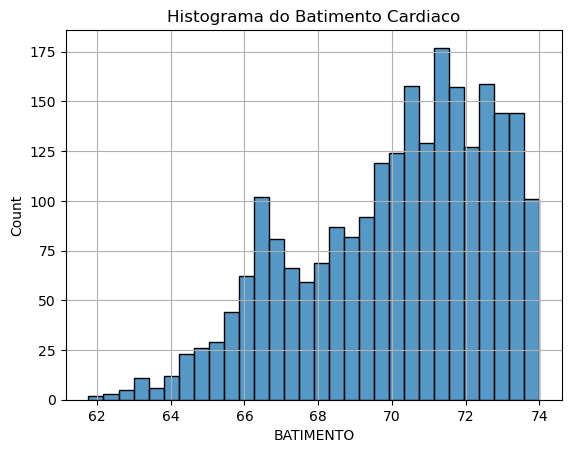

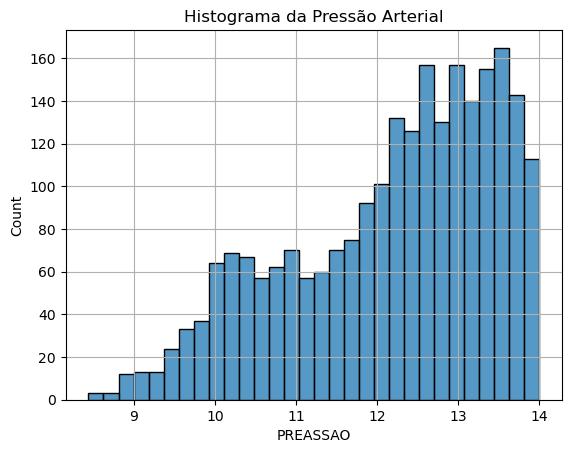

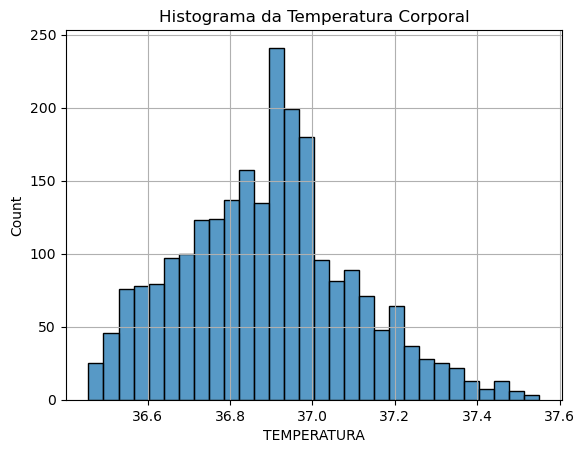

In [26]:
estatistica_Batimento = pd.DataFrame()
estatistica_Pressao = pd.DataFrame()
estatistica_Temperatura = pd.DataFrame()

media = np.zeros((100,3))
madiana = np.zeros((100,3))
moda = np.zeros((100,3))
desvio_padrao = np.zeros((100,3))
p: int = 0

# Segmentação do Datasete em 100 pacotes com 24 amostras
for k in range(0,2400,24):

    # Cálculo da média, madiana, e devio padrão
    aux = df[k:k+24].describe()

    media[p][0] = aux[batimento_literal][1]
    media[p][1] = aux[pressao_literal][1]
    media[p][2] = aux[temperatura_literal][1]
    
    madiana[p][0] = aux[batimento_literal][5]
    madiana[p][1] = aux[pressao_literal][5]
    madiana[p][2] = aux[temperatura_literal][5]
    
    desvio_padrao[p][0] = aux[batimento_literal][2]
    desvio_padrao[p][1] = aux[pressao_literal][2]
    desvio_padrao[p][2] = aux[temperatura_literal][2]
    
    moda[p][0] = statistics.mode(df[batimento_literal][k:k+24])
    moda[p][1] = statistics.mode(df[pressao_literal][k:k+24])
    moda[p][2] = statistics.mode(df[temperatura_literal][k:k+24])
    
    p = p + 1
    
estatistica_Batimento[media_literal] = media[:,0]
estatistica_Batimento[mediana_literal] = madiana[:,0]
estatistica_Batimento[moda_literal] = moda[:,0]
estatistica_Batimento[desvio_padrao_literal] = desvio_padrao[:,0]

estatistica_Pressao[media_literal] = media[:,1]
estatistica_Pressao[mediana_literal] = madiana[:,1]
estatistica_Pressao[moda_literal] = moda[:,1]
estatistica_Pressao[desvio_padrao_literal] = desvio_padrao[:,1]

estatistica_Temperatura[media_literal] = media[:,2]
estatistica_Temperatura[mediana_literal] = madiana[:,2]
estatistica_Temperatura[moda_literal] = moda[:,2]
estatistica_Temperatura[desvio_padrao_literal] = desvio_padrao[:,2]

print("Estatística do Batimento Cardíaco")
print(estatistica_Batimento)
print("Estatística da Pressão Arterial")
print(estatistica_Pressao)
print("Estatística da Temperatura Corporal")
print(estatistica_Temperatura)

# Plotar os histogramas dos dados
plt.figure()
plt.grid()
plt.title("Histograma do Batimento Cardiaco")
sns.histplot(data = df, x = batimento_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Pressão Arterial")
sns.histplot(data = df, x = pressao_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Temperatura Corporal")
sns.histplot(data=df, x = temperatura_literal, bins = 30)

**Tomada de Decisão:** De acordo com a literatura, o diagnóstico de uma pessoa com base nos sinais vitais, enquanto ela estiver em repouso, deve seguir as seguintes instruções.

**Batimento Cardíaco**:

Quando procurar atendimento de emergência?

Tanto acelerados quanto lentos, os batimentos cardíacos podem ser sinal de alterações graves no coração. Assim, demandam rapidez no atendimento.  

Considera-se batimento cardíaco acelerado quando a pessoa tem mais de 100 batimentos por minuto. Se for um episódio de início agudo e duradouro, associado ou não com sintomas como fraqueza, tontura, desmaios e falta de ar, a pessoa deve procurar atendimento médico de emergência. Se o episódio durar poucos minutos, deve marcar consulta com cardiologista.

É considerado batimento cardíaco lento quando a pessoa tem menos de 60 batimentos por minuto. Essa medição deve ser realizada através do pulso, aparelho de pressão arterial (esfigmomanômetro), oxímetro (aparelho que detecta nível de oxigênio e também batimentos) ou relógio de pulso com detecção de batimentos. Se for episódio de início agudo associado a tontura, fraqueza ou desmaios, deve-se procurar atendimento de emergência. Caso não apresente sintomas associados, deve-se marcar consulta com cardiologista para investigação.

**Referência:** Proven Cordis: Clínica Médica. O que é arritmia e quando se preocupar. Disponível em: <https://prevencordis.com.br/blog/arritmia/#:~:text=Considera%2Dse%20batimento%20card%C3%ADaco%20acelerado,procurar%20atendimento%20m%C3%A9dico%20de%20emerg%C3%AAncia.>. Acesso em: 12 de Abril de 2023;

**Pressão Arterial:**

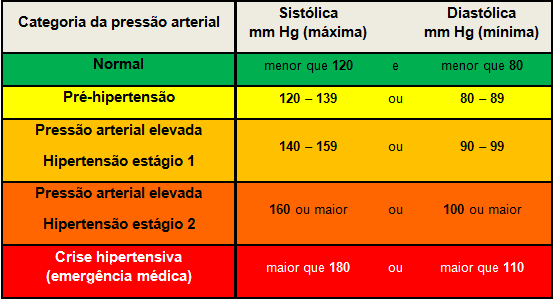

**Referência:** CISA: Centro de Informações sobre Saúde e Álcool. Hipertensão e uso excessivo de álcool. Disponível em: <https://cisa.org.br/sua-saude/informativos/artigo/item/64-hipertensao-e-uso-excessivo-de-alcool>. Acesso em: 12 de Abril de 2023;

**Temperatura Corporal:**

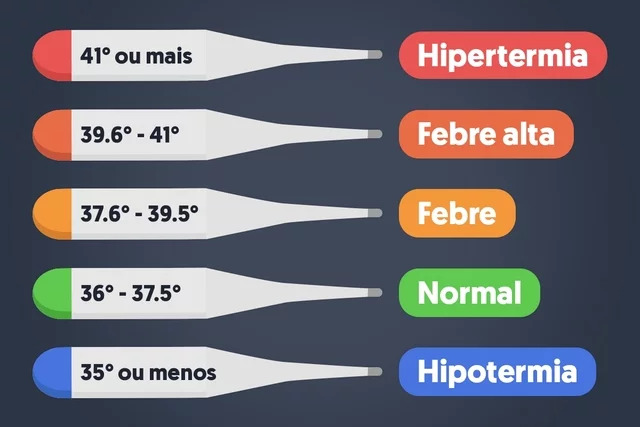

**Referência:** Express Remoções. Quantos Graus é Febre Alta? Como Medir a Temperatura. Disponível em: <https://www.expressremocoes.com.br/bem-estar/quantos-graus-e-febre-como-medir-a-temperatura/>. Acesso em: 12 de Abril de 2023;

Diante disso, o script a seguir tem a finalidade de analisar os dados do arquivo "sinaisvitais003 100dias DV2 RAxxx4" após o tratamento, e realizar um diagnóstico de acordo com as instruções anteriores. 

In [33]:
diagnostico = pd.DataFrame()
d: list[str] = []
# Diagnóstico do Batimento Cardíaco
for m in estatistica_Batimento[media_literal]:
    
    if (m < 60): d.append("Preocupante: Batimento Cardíaco Lento.")
    elif ((m > 60) and (m < 100)): d.append("Normal.")
    else: d.append("Preocupante: Batimento Cardíaco Rápido.")

diagnostico[batimento_cardiaco_literal] = d

d.clear()

# Diagnóstico da Pressão Arterial
for m in estatistica_Pressao[media_literal]:
    
    if (m < 9): d.append("Pressão Baixa")
    elif ((m >= 9) and (m <= 12)): d.append("Normal")
    elif ((m > 12) and (m < 14)): d.append("Pré-Hipertensão")
    elif ((m >= 14) and (m < 16)): d.append("Hipertensão Estágio 1")
    elif ((m >= 16) and (m < 18)): d.append("Hipertensão Estágio 2")
    elif (m >= 18): d.append("Crise Hipertensiva")

diagnostico[pressao_arterial_literal] = d

d.clear()

# Diagnóstico da Temperatura Corporal
for m in estatistica_Temperatura[media_literal]:
    
    if (m < 35): d.append("Hipotermia")
    elif ((m > 35) and (m <= 37.7)): d.append("Normal")
    elif ((m > 37.7) and (m <= 39.5)): d.append("Febre")
    elif ((m > 39.5) and (m <= 41)): d.append("Febre Alta")
    elif (m > 41): d.append("Hipertemia")

diagnostico[temperatura_corporal_literal] = d

d.clear()

print("Monitoramento diário: \n")
print(diagnostico)

Monitoramento diário: 

   Batimento Cardíaco Pressão Arterial Temperatura Corporal
0             Normal.  Pré-Hipertensão               Normal
1             Normal.  Pré-Hipertensão               Normal
2             Normal.  Pré-Hipertensão               Normal
3             Normal.  Pré-Hipertensão               Normal
4             Normal.  Pré-Hipertensão               Normal
..                ...              ...                  ...
95            Normal.           Normal               Normal
96            Normal.           Normal               Normal
97            Normal.           Normal               Normal
98            Normal.           Normal               Normal
99            Normal.           Normal               Normal

[100 rows x 3 columns]


Este trabalho poderia abordar uma situação de monitoramento de um paciente a cada, pois há dados para isso. Porém, a questão pede para segmentar a base de dados em pacotes de 24 amostras, e isso resulta em 100 dias. Consequentemente, é possível obter um diagnóstico diário para tomada de decisão com base no resultado anterior como, por exemplo, realizar ações diminuir a pressão arterial quando estiver "pré-hipertensão".

Além disso, pode-se fazer um diagnóstico após os 100 dias, e tomar uma decisão diferente. Por exemplo, recomendar alguns medicamentos para o paciente se tratar nos próximos dias. Nesse sentido, implementou-se o script a seguir.

In [32]:
print("Diagnóstico: \n")
print("Batimento Cardíaco: ", statistics.mode(diagnostico[batimento_cardiaco_literal]))
print("Pressão Arterial: ", statistics.mode(diagnostico[pressao_arterial_literal]))
print("Temperatura Corporal: ", statistics.mode(diagnostico[temperatura_corporal_literal]))

Diagnóstico: 

Batimento Cardíaco:  Normal.
Pressão Arterial:  Pré-Hipertensão
Temperatura Corporal:  Normal


**Conclusão:** As medidas dos sinais vitais foram coletadas de hora em hora, durante 100 dias. Com isso, baseado no valor médio destes indicadores em cada um dos dias, foi possível fazer um diagnóstico diário. Por fim, aplicou-se o conceito de moda nos 100 dias para concluir o diagnóstico e, por esta metodologia, obteve-se o resultado anterior.

**Apêndice:** Plotagem dos Sinais e dos Histogramas dos Dados antes da preparação.

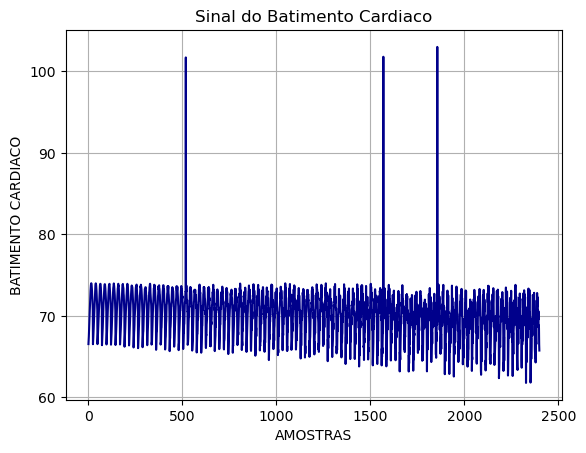

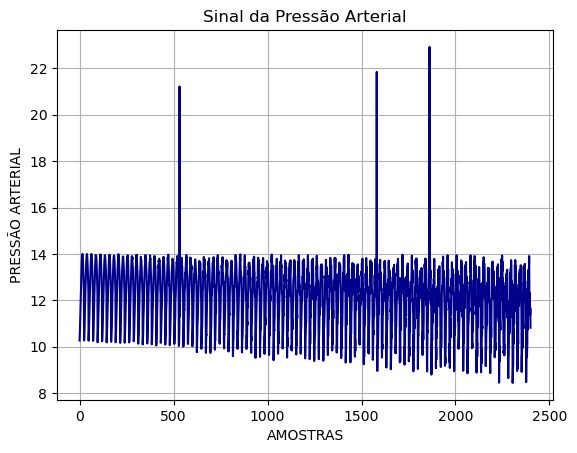

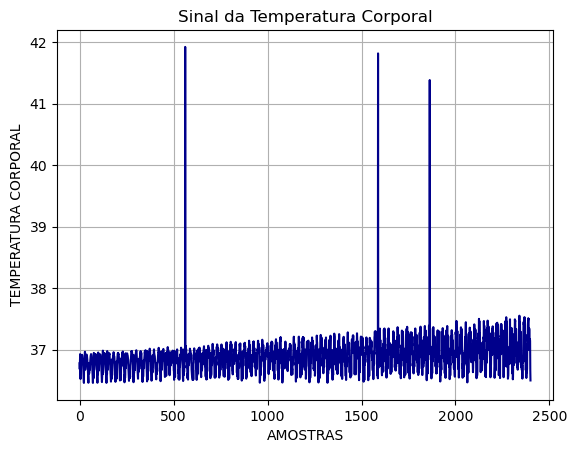

<Axes: title={'center': 'Histograma da Temperatura Corporal'}, xlabel='TEMPERATURA', ylabel='Count'>

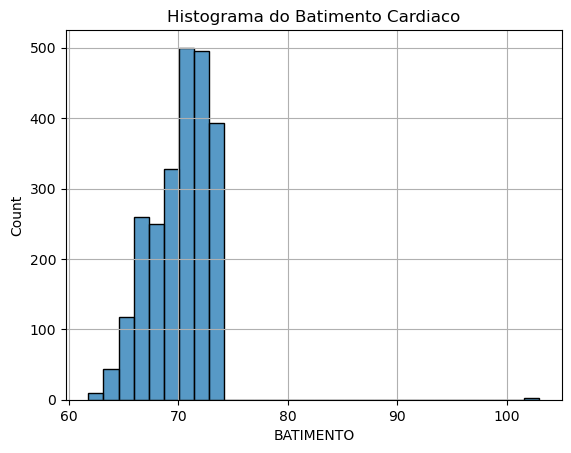

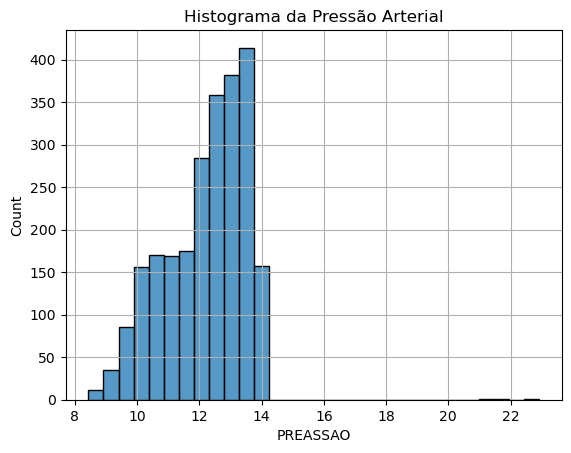

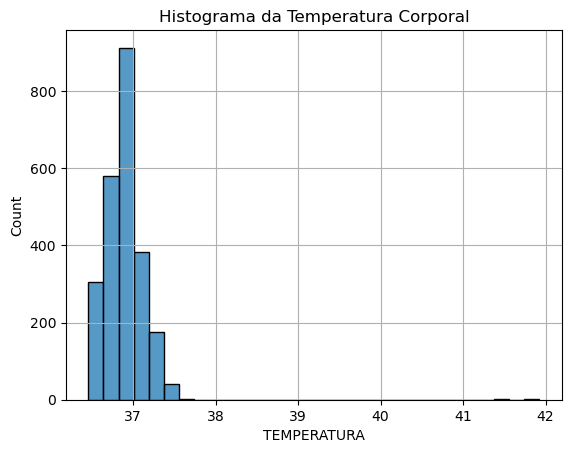

In [14]:
# Plotar o sinal do batimento cardíaco
plt.plot(df0[batimento_literal],color='darkblue')
plt.grid()
plt.title("Sinal do Batimento Cardiaco")
plt.xlabel("AMOSTRAS")
plt.ylabel("BATIMENTO CARDIACO")
plt.show()

# Plotar o sinal da pressão arterial
plt.plot(df0[pressao_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Pressão Arterial")
plt.xlabel("AMOSTRAS")
plt.ylabel("PRESSÃO ARTERIAL")
plt.show()

# Plotar o sinal da temperatura
plt.plot(df0[temperatura_literal],color='darkblue')
plt.grid()
plt.title("Sinal da Temperatura Corporal")
plt.xlabel("AMOSTRAS")
plt.ylabel("TEMPERATURA CORPORAL")
plt.show()

# Plotar os histogramas dos dados
plt.figure()
plt.grid()
plt.title("Histograma do Batimento Cardiaco")
sns.histplot(data = df0, x = batimento_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Pressão Arterial")
sns.histplot(data = df0, x = pressao_literal, bins = 30)
plt.figure()
plt.grid()
plt.title("Histograma da Temperatura Corporal")
sns.histplot(data = df0, x = temperatura_literal, bins = 30)